<a href="https://colab.research.google.com/github/RaihanAzharRafi/Orange-Data-Mining/blob/main/Week_10_Kaggle_k_means_iris_dataset_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Iris Dataset Practice**
### **Nama : Raihan Azhar Rafi**
### **Kelas : TK-42-02**
### **Nim : 1103180166**

Sumber Saya Peroleh Dari : https://www.kaggle.com/code/sablinavis/k-means-iris-dataset-practice/notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#menyambungkan antara google colab dengan drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
iris = pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris = iris.iloc[:,3:5]
iris.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal length')

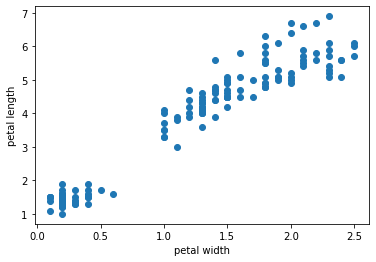

In [6]:
plt.scatter(iris['PetalWidthCm'],iris['PetalLengthCm'])
plt.xlabel("petal width")
plt.ylabel("petal length")

The iris data k-means cluster might improve after some scaling.

In [7]:
scaler = MinMaxScaler()

In [8]:
iris_scaled = scaler.fit_transform(iris)

The MinMaxScaler returns an arrays, that can then be converted to a dataframe.

In [9]:
iris_scaled = DataFrame(iris_scaled)

In [10]:
iris_scaled.head()

,0,1
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


Adding the correct column names.

In [11]:
iris_scaled = iris_scaled.set_axis(['petal_length','petal_width'],axis=1)

In [12]:
iris_scaled.head()

,petal_length,petal_width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


Text(0, 0.5, 'petal length')

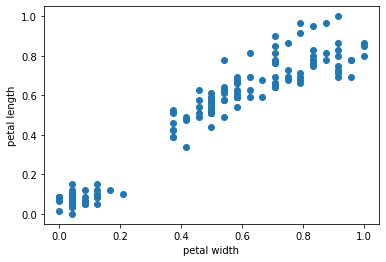

In [13]:
plt.scatter(iris_scaled['petal_width'],iris_scaled['petal_length'])
plt.xlabel("petal width")
plt.ylabel("petal length")

When comparing this and the previous graph, it doesn't seem a scaling has been necessary.

In [14]:
k_range = range(1,11)
SSE = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(iris_scaled[['petal_length','petal_width']])
    SSE.append(km.inertia_)

In [15]:
print(SSE)

[28.391514358368717, 5.179687509974785, 1.7050986081225128, 1.1621031930971282, 0.8570856553216402, 0.6827536831558556, 0.5683512655008139, 0.48940285486466695, 0.44079952131012795, 0.3703681109265666]


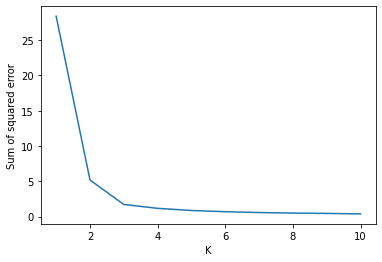

In [16]:
plt.xlabel('K')
plt.ylabel("Sum of squared error")
plt.plot(k_range,SSE)

The elbow plot, indicates that k = 3 is the best cluster fit.

In [17]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [18]:
y_pred = km.fit_predict(iris_scaled[["petal_length","petal_width"]])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

the fit_predict, predicts that the data point fall into 3 groups/cluster, and labeled them 0, 1, and 2

In [19]:
iris_scaled["cluster"] = y_pred
iris_scaled.head()

,petal_length,petal_width,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


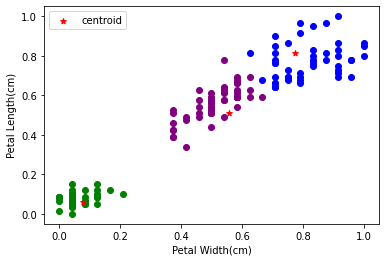

In [20]:
iris1 = iris_scaled[iris_scaled.cluster==0]
iris2 = iris_scaled[iris_scaled.cluster==1]
iris3 = iris_scaled[iris_scaled.cluster==2]
plt.scatter(iris1['petal_width'],iris1['petal_length'],color="blue")
plt.scatter(iris2['petal_width'],iris2['petal_length'], color="green")
plt.scatter(iris3['petal_width'],iris3['petal_length'], color="purple")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",marker="*",label="centroid")
plt.xlabel("Petal Width(cm)")
plt.ylabel("Petal Length(cm)")
plt.legend()

The optimal value is for k is 3, and it is in accordance with the species classified in this dataset: setosa, versicolor and virginica.